# Financial Analysis Using Python

##### This analysis aims to assess the financial performance of XYZ Company using its balance sheet and income statement data for the years 2022 and 2023. Through this project, we will classify and clean financial data, calculate key financial ratios, and visualize critical metrics to gain insights into the company's operational efficiency, profitability, and financial stability. The primary focus will be on understanding trends in assets, liabilities, equity, and profitability. We will also compute key financial ratios, including Return on Equity (ROE), EBIT Margin, and Working Capital Turnover, to analyze the company’s efficiency in utilizing its resources.

##### The analysis is divided into the following steps:

###### -Data preparation and classification using Excel.
###### -Loading, cleaning, and processing data in Python.
###### -Visualizing balance sheet items and financial metrics.
###### -Performing ratio analysis to evaluate company performance in 2022 and 2023.
###### -Comparative analysis of key financial metrics across two years.

###### Each section of the notebook will include both calculations and interpretative analysis to provide a clear understanding of the company’s financial health.

### Imports

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Data Preparation and Cleaning

In [111]:
# Defining the constants
TAX_RATE_2022 = 0.2090
TAX_RATE_2023 = 0.1930
OPERATIONAL_CASH_PROPORTION = 0.20


In [112]:
# Load all sheets from Excel into separate DataFrames
excel_file_path = "nestle_dataset.xlsx"
sheets = pd.read_excel(excel_file_path, sheet_name=None)

# Accessing individual sheets as DataFrames
income_statement = sheets['Income statements']
other_trading_and_operating_profit_item = sheets['Other trading & op inc. - exp.']
financial_profit_items = sheets['Financial inc. - exp.']
trade_and_other_payable_items = sheets['Trade & other payables']
ppe_items = sheets['Property, plant & equipement']
balance_sheet = sheets['Balance sheet']

In [113]:
# Remove rows with missing titles and those without relevant data.
income_statement = income_statement.dropna()
other_trading_and_operating_profit_item = other_trading_and_operating_profit_item.dropna()
financial_profit_items = financial_profit_items.dropna()
trade_and_other_payable_items = trade_and_other_payable_items.dropna()
ppe_items = ppe_items.dropna()
balance_sheet = balance_sheet.dropna()


In [114]:
# Compute Averages: Calculate the average for each DataFrame, using the end-of-year values for 2022 and 2023.
income_statement['Average2022_23'] = income_statement[['2022','2023']].mean(axis =1)
other_trading_and_operating_profit_item['Average2022_23'] = other_trading_and_operating_profit_item[['2022', '2023']].mean(axis=1)
financial_profit_items['Average2022_23'] = financial_profit_items[['2022', '2023']].mean(axis=1)
trade_and_other_payable_items['Average2022_23'] = trade_and_other_payable_items[['2022', '2023']].mean(axis=1)
ppe_items['Average2022_23'] = ppe_items[['2022', '2023']].mean(axis=1)
balance_sheet['Average2022_23'] = balance_sheet[['2022', '2023']].mean(axis=1)

/var/folders/r_/2_0342f92rb7w06qdsctf01c0000gn/T/ipykernel_40330/1815107298.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income_statement['Average2022_23'] = income_statement[['2022','2023']].mean(axis =1)
/var/folders/r_/2_0342f92rb7w06qdsctf01c0000gn/T/ipykernel_40330/1815107298.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  other_trading_and_operating_profit_item['Average2022_23'] = other_trading_and_operating_profit_item[['2022', '2023']].mean(axis=1)
/var/folders/r_/2_0342f92rb7w06qdsctf01c

In [115]:
# Set Index: Use item labels as the index for each DataFrame for easier reference and analysis.
income_statement.set_index('Income statement item', inplace=True)
other_trading_and_operating_profit_item.set_index('Other trading and operating profit item', inplace=True)
financial_profit_items.set_index('Financial profit items', inplace=True)
trade_and_other_payable_items.set_index('Trade & other payables items', inplace=True)
ppe_items.set_index('P,P & E items', inplace=True)
balance_sheet.set_index('Balance sheet item', inplace=True)

In [116]:
balance_sheet.head()

,2023,2022,2021,Equity,Asset,Liablilities,Current / non-current,Operating / Non-operating,Average2022_23
Balance sheet item,,,,,,,,,
Cash and cash equivalents,4816.0,5511.0,6988.0,0.0,1.0,0.0,1.0,2.0,5163.5
Short-term investments,1035.0,1176.0,7007.0,0.0,1.0,0.0,1.0,0.0,1105.5
Inventories,11896.0,15019.0,11982.0,0.0,1.0,0.0,1.0,1.0,13457.5
Trade and other receivables,10995.0,11116.0,11155.0,0.0,1.0,0.0,1.0,1.0,11055.5
Prepayments,521.0,549.0,575.0,0.0,1.0,0.0,1.0,1.0,535.0


### Data Visualization

<Figure size 1000x600 with 0 Axes>

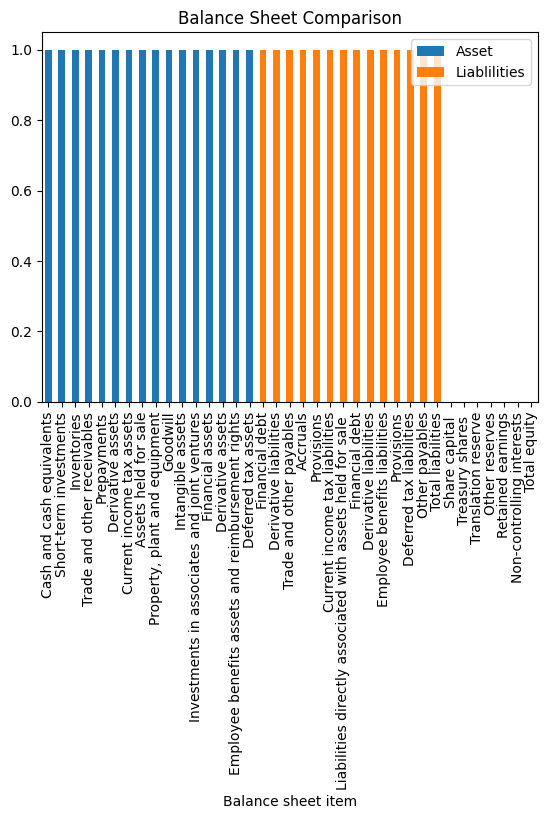

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Assets vs Liablilities
plt.figure(figsize=(10, 6))
balance_sheet[['Asset', 'Liablilities']].plot(kind='bar', stacked=True)
plt.title("Balance Sheet Comparison")
plt.show()


In [118]:
trade_and_other_payable_items.head()

,2023,2022,2021,Average2022_23
Trade & other payables items,,,,
Trade payables,14195.0,15798.0,15625.0,14996.5
Social security and sundry taxes and levies,1665.0,1766.0,1872.0,1715.5
Other payables,3344.0,2959.0,3410.0,3151.5
Total,19204.0,20523.0,20907.0,19863.5


# 1. Working Capital Turnover Ratio


In [119]:

# Method 1: Direct Calculation
def working_capital_turnover_direct(revenue, operating_working_capital):
    return revenue / operating_working_capital

# Method 2: Using Components
def working_capital_turnover_components(revenue, accounts_receivable, inventory, accounts_payable):
    operating_working_capital = accounts_receivable + inventory - accounts_payable
    return revenue / operating_working_capital


# 2. Invested Capital Turnover

In [120]:
# Method 1: Direct Calculation
def invested_capital_turnover_direct(revenue, invested_capital):
    return revenue / invested_capital

# Method 2: Using Components
def invested_capital_turnover_components(revenue, ppe, goodwill, intangible_assets, other_non_current_assets):
    invested_capital = ppe + goodwill + intangible_assets + other_non_current_assets
    return revenue / invested_capital

# 3. EBIT Margin

In [121]:
# Method 1: Direct Calculation
def ebit_margin_direct(ebit, revenue):
    return ebit / revenue

# Method 2: Using Components
def ebit_margin_components(gross_profit, sga_expenses, revenue):
    ebit = gross_profit - sga_expenses
    return ebit / revenue

# 4. NOPAT Margin

In [122]:
# Method 1: Using EBIT Margin and Tax Rate
def nopat_margin_direct(ebit_margin, tax_rate):
    return ebit_margin * (1 - tax_rate)

# Method 2: Using Breakdown of Operating Components
def nopat_margin_components(ebit, tax_rate):
    nopat = ebit * (1 - tax_rate)
    return nopat

# 5. Return on Invested Capital (ROIC)

In [123]:
# Method 1: Direct Calculation
def roic_direct(nopat, invested_capital):
    return nopat / invested_capital

# Method 2: Using NOPAT Margin and Invested Capital Turnover
def roic_components(nopat_margin, invested_capital_turnover):
    return nopat_margin * invested_capital_turnover

# 6. Return on Non-Operating Assets After Tax

In [124]:
# Method 1: Using Interest Income Directly
def return_non_operating_assets_direct(interest_income, tax_rate):
    return interest_income * (1 - tax_rate)

# Method 2: Decompose Returns
def return_non_operating_assets_components(non_operating_income, tax_rate):
    return non_operating_income * (1 - tax_rate)

# 7. Cost of Debt After Tax

In [125]:
# Method 1: Using Interest Expenses and Tax Rate
def cost_of_debt_after_tax_direct(interest_expense, total_debt, tax_rate):
    return (interest_expense / total_debt) * (1 - tax_rate)

# Method 2: Decompose into Interest and Debt Costs
def cost_of_debt_after_tax_components(interest_expense, other_debt_related_costs, total_debt, tax_rate):
    total_interest_costs = interest_expense + other_debt_related_costs
    return (total_interest_costs / total_debt) * (1 - tax_rate)

# 8. Return on Equity (ROE)

In [126]:
# Method 1: Direct Calculation
def roe_direct(net_income, shareholders_equity):
    return net_income / shareholders_equity

# Method 2: Decompose into Components
def roe_components(net_income, total_assets, total_debt, shareholders_equity):
    return_on_assets = net_income / total_assets
    cost_of_debt = total_debt / total_assets
    financial_leverage = total_assets / shareholders_equity
    return return_on_assets * (1 - cost_of_debt) * financial_leverage